In [190]:
class Node():
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None

class Tree():
    def __init__(self):
        self.root = None

    def append(self, data):
        if self.root:
            self.append_(data, self.root)
        else:
            self.root = Node(data)

    def append_(self, data, node):
        if node.data > data:
            if node.left:
                self.append_(data, node.left)
            else:
                node.left = Node(data)
        else:
            if node.right:
                self.append_(data, node.right)
            else:
                node.right = Node(data)

    def print(self):
        self.print_(self.root)

    def print_(self, node):
        if node:
            print(node.data)
            if node.left:
                self.print_(node.left)
            if node.right:
                self.print_(node.right)
    
    def print_bws(self):
        self.print_bws_([self.root])
    
    def print_bws_(self, cont=[]):
        if len(cont) != 0:
            node = cont[0]
            if node:
                cont = cont[1:]
                print(node.data)
                if node.left:
                    cont.append(node.left)
                if node.right:
                    cont.append(node.right)
                self.print_bws_(cont)

    def delete(self, data):
        if self.root:
            self.delete_(self.root, data)

    def delete_(self, node, data):  
        if node.data > data:
            if node.left:
                if node.left.data != data:
                    self.delete_(node.left, data)
                else:
                    subtree = node.left
                    node.left = None
                    self.insert_subtree(subtree.left)
                    self.insert_subtree(subtree.right)
                
        elif node.data < data:
            if node.right:
                if node.right.data != data:
                    self.delete_(node.right, data)
                else:
                    subtree = node.right
                    node.right = None
                    self.insert_subtree(subtree.left)
                    self.insert_subtree(subtree.right)
        else:
            subtree = self.root
            self.root = None
            self.insert_subtree(subtree.left)
            self.insert_subtree(subtree.right)
                

    def insert_subtree(self, root_from):
        if root_from:
            self.append(root_from.data)
            if root_from.left:
                self.insert_subtree(root_from.left)
            if root_from.right:
                self.insert_subtree(root_from.right)

    def is_balanced(self):
        return self.balanced_(self.root)

    def small_rotation(self, node, direction):
        print("small rotation", node.data, direction)
        cur_node = node
        if direction == 1:
            node = node.left
            node.right = cur_node
            node.right.left = None
        else:
            node = node.right
            node.left = cur_node
            node.left.right = None
        return node

    def big_rotation(self, node, direction):
        print("big rotation", node.data, direction)
        cur_node = node
        if direction == 1:
            node = node.left
            cur_node.left = node.right
            node.right = cur_node
        else:
            node = node.right
            cur_node.right = node.left
            node.left = cur_node
        return node

    def balanced_(self, node):
        if node:
            l_balanced, l_height = self.balanced_(node.left)
            r_balanced, r_height = self.balanced_(node.right)
            res = abs(l_height-r_height)<2 and l_balanced and r_balanced
            return res, max(l_height, r_height) + 1            
        else:
            return True, 0
        

    def height(self, node):
        if node:
            return max(self.height(node.left), self.height(node.right)) + 1
        else:
            return 0

    def balance(self):
        if self.root is not None:
            self.root = self.balance_(self.root)
        

    def balance_(self, node):
        print("inside recursive function")
        if node:
            node.left = self.balance_(node.left)
            node.right = self.balance_(node.right)
            balanced, height = self.balanced_(node)
            if not balanced:
                print('found imbalanced node', node.data)
                if self.height(node.left) > self.height(node.right):
                    if node.left:
                        if self.height(node.left.right) > self.height(node.left.left):
                            node.left = self.small_rotation(node.left, -1)
                    node = self.big_rotation(node, 1)
                elif self.height(node.left) < self.height(node.right):
                    if node.right:
                        if self.height(node.right.right) < self.height(node.right.left):
                            node.right = self.small_rotation(node.right, 1)
                    node = self.big_rotation(node, -1)
        return node
            
        
        
                
            

In [113]:
a = Tree()

In [114]:
a.append(10)

In [115]:
a.append(20)

In [116]:
a.print()

10
20


In [117]:
a.append(5)
a.append(25)
a.append(2)
a.append(7)
a.append(15)

In [118]:
a.print()

10
5
2
7
20
15
25


In [119]:
a.print_bws()

10
5
20
2
7
15
25


In [120]:
a.delete(5)

In [121]:
a.print_bws()

10
2
20
7
15
25


In [92]:
a.delete(7)

In [93]:
a.print_bws()

10
2
20
15
25


In [94]:
a.delete(10)

In [95]:
a.print_bws()

2
20
15
25


In [96]:
a.delete(25)
a.delete(15)
a.delete(20)
a.delete(2)

In [97]:
a.print_bws()

In [98]:
a.delete(2)

In [108]:
a.height(a.root)

3

In [129]:
a = Tree()
# a.append(5)
# a.append(25)
# a.append(2)
# a.append(7)
# a.append(15)
# a.append(1)
# a.append(30)
a.is_balanced()

(False, 4)

In [126]:
a.print_bws()

5
2
25
1
7
30
15


In [191]:
a = Tree()
a.append(10)
a.append(20)
a.append(15)
a.append(4)
a.append(3)
a.append(8)
a.append(5)
a.append(7)
a.append(6)
# a.append(20)
# a.append(22)
# a.append(16)
# a.append(15)
# a.append(17)
# a.append(18)
a.print_bws()

10
4
20
3
8
15
5
7
6


In [192]:
a.balanced_(a.root.left)

(False, 5)

In [193]:
a.balance()

inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function
found imbalanced node 5
small rotation 7 1
big rotation 5 -1
inside recursive function
found imbalanced node 8
big rotation 8 1
found imbalanced node 4
big rotation 4 -1
inside recursive function
inside recursive function
inside recursive function
inside recursive function
inside recursive function


In [182]:
a.print_bws()

10
6
20
4
8
15
3
5
7


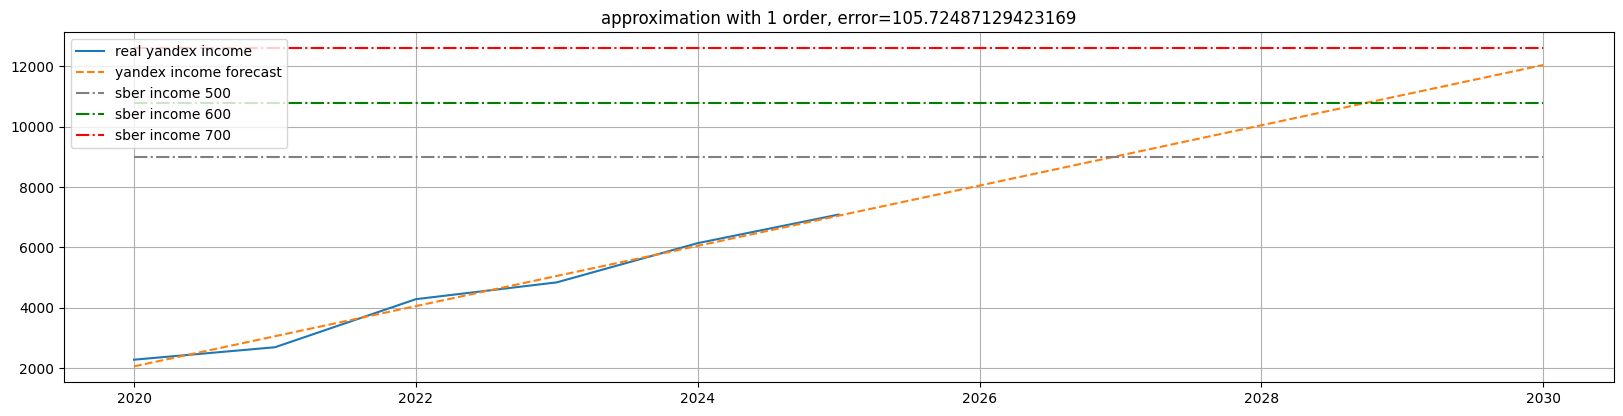

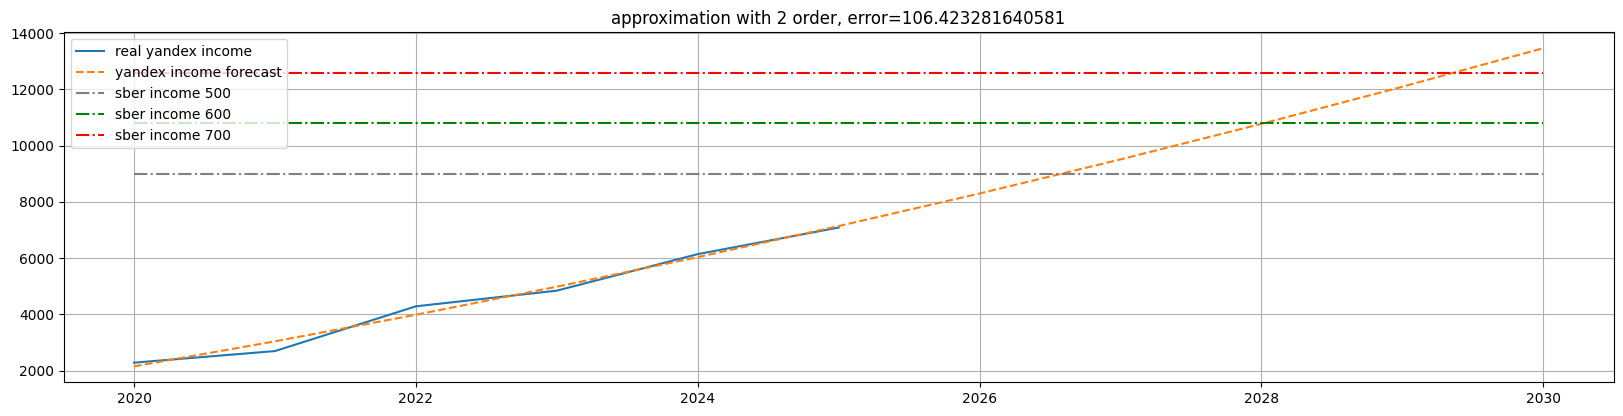

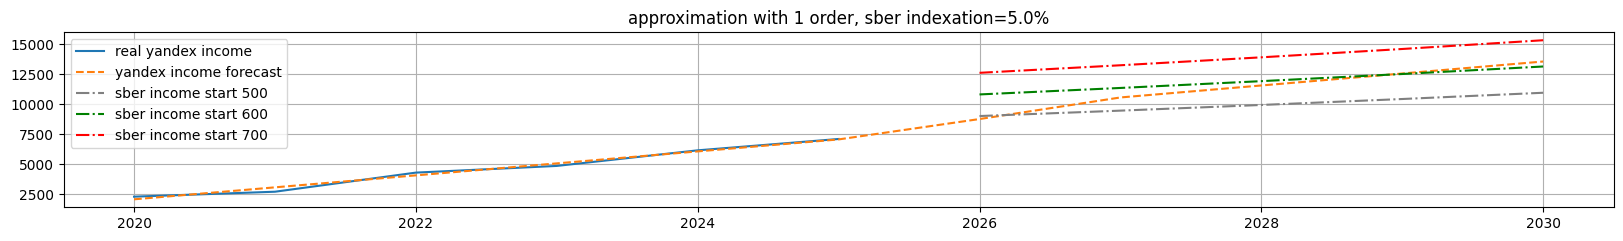

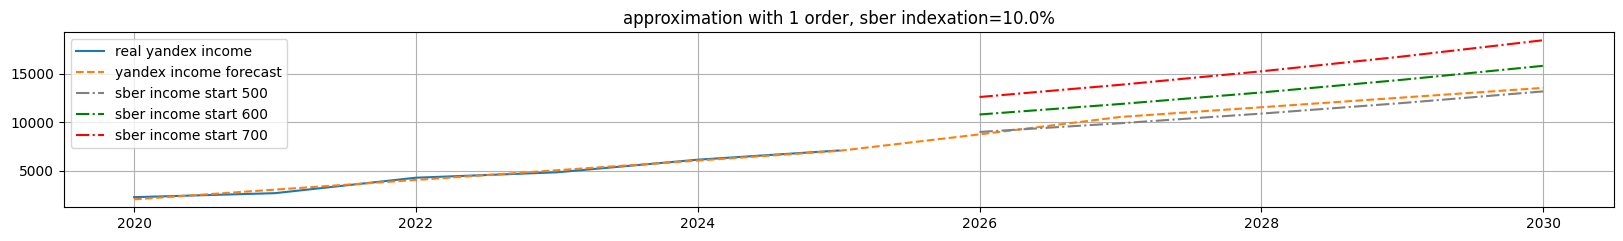

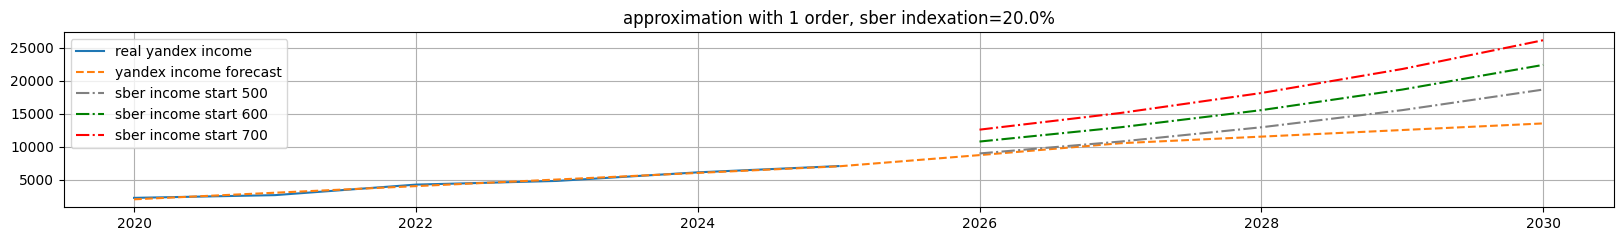

In [68]:
from matplotlib import pyplot as plt
import numpy as np

income = [2283, 2695, 4287, 4844, 6143, 7089]
year = [2020, 2021, 2022, 2023, 2024, 2025]
years_future = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
years_sber = [2026, 2027, 2028, 2029, 2030]
for index in [0.05, 0.1, 0.2]:
    z = np.polyfit(year, income, 1)
    p = np.poly1d(z)
    income_aprox = p(years_future)
    income_aprox[6] += 700
    for i in range(7, 11):
        income_aprox[i] += 1500
    sber_income = []
    for sber_zp in [500, 600, 700]:
        year_income = []
        for i in range(len(years_sber)):
            year_income.append(sber_zp*12 + sber_zp*6)
            sber_zp *= 1+index 
        sber_income.append(year_income)

    plt.figure(figsize=(20, 5))
    plt.subplot(2,1, order)
    plt.title('approximation with {} order, sber indexation={}%'.format(1, index*100))
    plt.plot(year, income, label='real yandex income')
    plt.plot(years_future, income_aprox, label='yandex income forecast', linestyle='--')
    plt.plot(years_sber, sber_income[0], label='sber income start 500', linestyle='-.', color='grey')
    plt.plot(years_sber, sber_income[1], label='sber income start 600', linestyle='-.', color='green')
    plt.plot(years_sber, sber_income[2], label='sber income start 700', linestyle='-.', color='red')
    plt.grid()
    plt.legend()

In [66]:
500*1.4

700.0

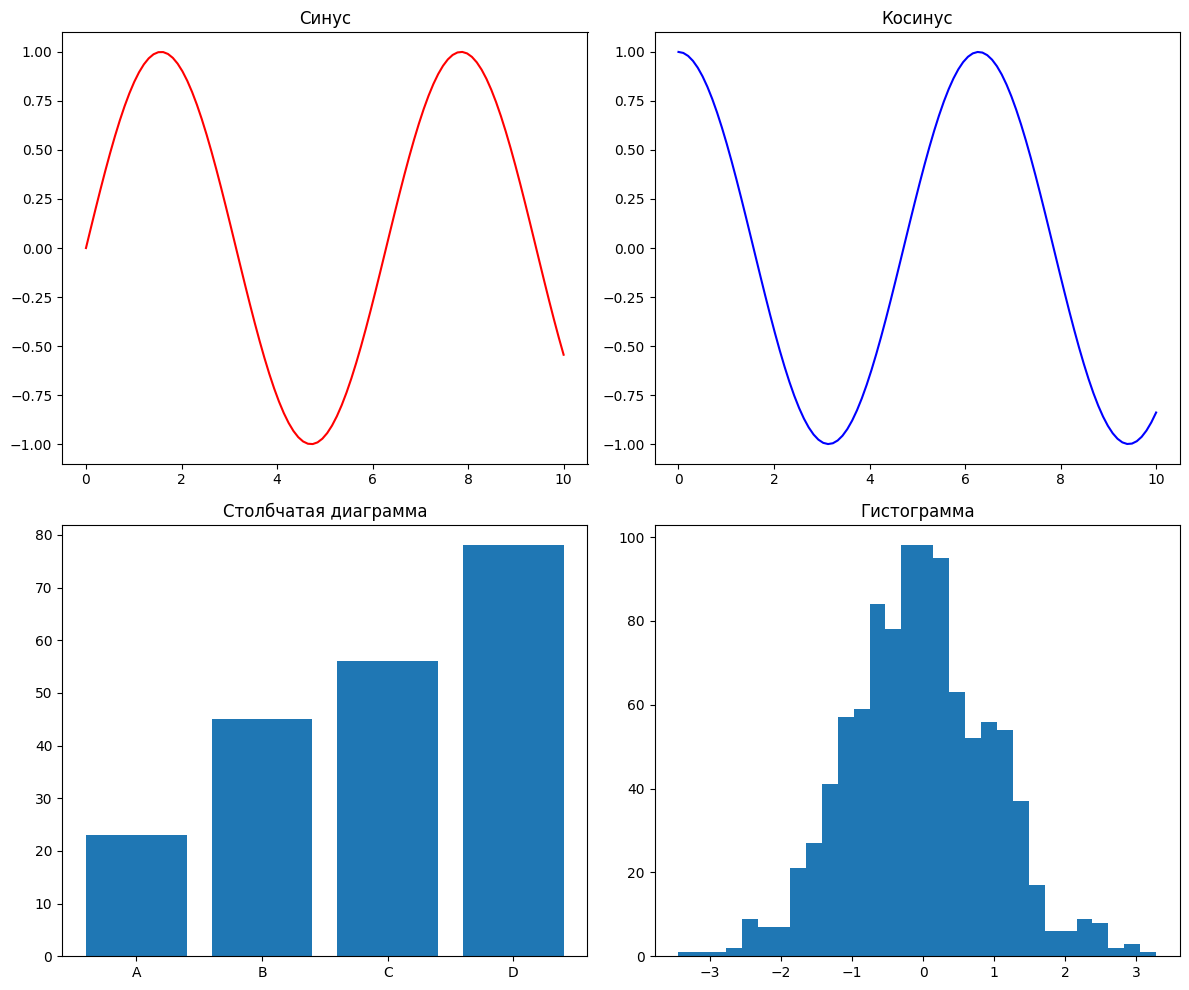

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# График 1
axes[0, 0].plot(x, np.sin(x), 'r-')
axes[0, 0].set_title('Синус')

# График 2
axes[0, 1].plot(x, np.cos(x), 'b-')
axes[0, 1].set_title('Косинус')

# График 3
axes[1, 0].bar(categories, values)
axes[1, 0].set_title('Столбчатая диаграмма')

# График 4
axes[1, 1].hist(data, bins=30)
axes[1, 1].set_title('Гистограмма')

plt.tight_layout()
plt.show()